In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [2]:
titanic = pd.read_csv('titanic.csv', sep=';', index_col='PassengerId')

# Идиома: расчет частоты события

- `.sum()` вектора из нулей и единиц = количество единиц
- `.mean()` вектора из нулей и единиц = доля единиц

In [3]:
titanic.Survived.mean()

0.38383838383838381

Какова частота выполнения условия?

In [4]:
(titanic.Age >= 18).mean()

0.67452300785634123

Сколько всего строк, удовлетворяющих условию?

In [5]:
(titanic.Age >= 18).sum()

601

# GroupBy

Как посчитать долю выживших в разных группах?

In [9]:
print 'female\t', titanic.loc[titanic.Sex == 'female', 'Survived'].mean()
print 'male\t', titanic.loc[titanic.Sex == 'male', 'Survived'].mean()

female	0.742038216561
male	0.188908145581


In [10]:
titanic.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

[Split -> Apply -> Combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

Аналогично `GROUP BY` в SQL:
```sql
SELECT Sex, AVG(Survived)
FROM titanic
GROUP BY Sex;
```

In [11]:
titanic.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [12]:
titanic.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

## 1) Разбиение (Split)

GroupBy хранит исходный `DataFrame` (или `Series`) и разбиение на группы, т.е. соответствие "название группы (значение колонки, по которой группируем) – список индексов"

In [13]:
splits = titanic.groupby('Sex')
print type(splits)

<class 'pandas.core.groupby.DataFrameGroupBy'>


In [14]:
splits.groups

{'female': Int64Index([  2,   3,   4,   9,  10,  11,  12,  15,  16,  19,
             ...
             867, 872, 875, 876, 880, 881, 883, 886, 888, 889],
            dtype='int64', name=u'PassengerId', length=314),
 'male': Int64Index([  1,   5,   6,   7,   8,  13,  14,  17,  18,  21,
             ...
             874, 877, 878, 879, 882, 884, 885, 887, 890, 891],
            dtype='int64', name=u'PassengerId', length=577)}

In [15]:
splits.get_group('female')  # тот же результат, что и titanic.loc[titanic.Sex == 'female']

,Survived,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,...,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,...,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,...,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,...,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,...,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,...,1,230433,26.0000,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,...,0,7552,10.5167,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,...,5,382652,29.1250,NaN,Q


Другие способы разбиения:

- по нескольким колонкам

In [18]:
titanic.groupby(['Sex', 'Pclass']).groups.keys()

[('female', 3),
 ('female', 2),
 ('male', 3),
 ('male', 1),
 ('male', 2),
 ('female', 1)]

- по колонке, которой нет в исходном `DataFrame`

In [19]:
adult = (titanic.Age >= 18)

In [21]:
adult = (titanic.Age >= 18)
adult.loc[titanic.Age.isnull()] = np.nan

In [22]:
adult.value_counts(dropna=False)

 1.0    601
NaN     177
 0.0    113
Name: Age, dtype: int64

In [23]:
titanic.groupby(adult).groups.keys()

[0.0, 1.0]

NB: группа, соответствующая значению `NaN`, не создается. Можно это обойти, предварительно заполнив `NaN` каким-нибудь специальным значением.

In [24]:
titanic.groupby(adult.fillna('NA')).groups.keys()

[0.0, 1.0, 'NA']

In [39]:
titanic.groupby(adult.fillna('NA')).Survived.mean()

Age
0.0    0.539823
1.0    0.381032
NA     0.293785
Name: Survived, dtype: float64

- по значению функции, рассчитанной по индексу

In [27]:
titanic.groupby(lambda s: s % 3).groups

{0: Int64Index([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,
             ...
             864, 867, 870, 873, 876, 879, 882, 885, 888, 891],
            dtype='int64', name=u'PassengerId', length=297),
 1: Int64Index([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,
             ...
             862, 865, 868, 871, 874, 877, 880, 883, 886, 889],
            dtype='int64', name=u'PassengerId', length=297),
 2: Int64Index([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,
             ...
             863, 866, 869, 872, 875, 878, 881, 884, 887, 890],
            dtype='int64', name=u'PassengerId', length=297)}

In [28]:
titanic.groupby(titanic.index % 3).groups  # то же самое

{0: Int64Index([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,
             ...
             864, 867, 870, 873, 876, 879, 882, 885, 888, 891],
            dtype='int64', name=u'PassengerId', length=297),
 1: Int64Index([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,
             ...
             862, 865, 868, 871, 874, 877, 880, 883, 886, 889],
            dtype='int64', name=u'PassengerId', length=297),
 2: Int64Index([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,
             ...
             863, 866, 869, 872, 875, 878, 881, 884, 887, 890],
            dtype='int64', name=u'PassengerId', length=297)}

NB: можно разбивать не только по строкам, но и по столбцам (`axis=1`)

## 2) Агрегация (Apply + Combine)

Обычные функции агрегации:

In [29]:
splits.count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312
male,577,577,577,453,577,577,577,577,107,577


In [30]:
splits.nunique()

,Survived,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,2,3,314,1,63,...,7,247,156,75,3
male,2,3,577,1,82,...,6,519,193,96,3


In [34]:
splits.mean().Survived

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Доступ к отдельному столбцу с тем же самым разбиением:

In [32]:
splits.Survived

In [33]:
splits.Survived.mean()  # быстрее, чем splits.mean().Survived

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [35]:
splits.Cabin.nunique()

Sex
female    75
male      96
Name: Cabin, dtype: int64

Несколько функций сразу:

In [41]:
titanic.groupby('Parch').Survived.agg(['mean', 'std', 'count'])

,mean,std,count
Parch,,,
0,0.343658,0.475279,678
1,0.550847,0.499529,118
2,0.500000,0.503155,80
3,0.600000,0.547723,5
4,0.000000,0.000000,4
5,0.200000,0.447214,5
6,0.000000,NaN,1


Первая/последняя/n-ая запись внутри каждой группы:

In [42]:
splits.first()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
male,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,E46,S


In [43]:
splits.last()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.0,1,2,W./C. 6607,23.45,B42,S
male,0,3,"Dooley, Mr. Patrick",32.0,0,0,370376,7.75,C148,Q


In [45]:
splits.nth(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,SibSp,Survived,Ticket
Sex,,,,,,,,,,
female,NaN,NaN,C,7.225,"Masselmani, Mrs. Fatima",0,3,0,1,2649
male,34.0,D56,S,13.000,"Beesley, Mr. Lawrence",0,2,0,1,248698


Произвольная функция:

In [51]:
def oldest(df):
    return df.Age.argmax()

In [52]:
splits.apply(oldest)

Sex
female    276
male      631
dtype: int64

# Работа со строками

[Документация](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [ ]:
titanic.Name.str

In [53]:
titanic.Name.apply(lambda s: s.split(',')[0])

PassengerId
1         Braund
2        Cumings
3      Heikkinen
4       Futrelle
5          Allen
         ...    
887     Montvila
888       Graham
889     Johnston
890         Behr
891       Dooley
Name: Name, Length: 891, dtype: object

In [58]:
titanic.Name.str.split(',').str[0]

PassengerId
1         Braund
2        Cumings
3      Heikkinen
4       Futrelle
5          Allen
         ...    
887     Montvila
888       Graham
889     Johnston
890         Behr
891       Dooley
Name: Name, Length: 891, dtype: object

In [61]:
titanic.Name.str.split(', ', n=1, expand=True)

,0,1
PassengerId,,
1,Braund,Mr. Owen Harris
2,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
3,Heikkinen,Miss. Laina
4,Futrelle,Mrs. Jacques Heath (Lily May Peel)
5,Allen,Mr. William Henry
...,...,...
887,Montvila,Rev. Juozas
888,Graham,Miss. Margaret Edith
889,Johnston,"Miss. Catherine Helen ""Carrie"""


In [62]:
titanic.Name.str.len()

PassengerId
1      23
2      51
3      22
4      44
5      24
       ..
887    21
888    28
889    40
890    21
891    19
Name: Name, Length: 891, dtype: int64

In [63]:
titanic.Name.str.upper()

PassengerId
1                                BRAUND, MR. OWEN HARRIS
2      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
3                                 HEIKKINEN, MISS. LAINA
4           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
5                               ALLEN, MR. WILLIAM HENRY
                             ...                        
887                                MONTVILA, REV. JUOZAS
888                         GRAHAM, MISS. MARGARET EDITH
889             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
890                                BEHR, MR. KARL HOWELL
891                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [64]:
titanic.Name.str.contains('Mr.')

PassengerId
1       True
2       True
3      False
4       True
5       True
       ...  
887    False
888    False
889    False
890     True
891     True
Name: Name, Length: 891, dtype: bool

In [67]:
titanic.Ticket.str.isalnum()

PassengerId
1      False
2      False
3      False
4       True
5       True
       ...  
887     True
888     True
889    False
890     True
891     True
Name: Ticket, Length: 891, dtype: bool

# Простая визуализация

[Официальная документация с примерами](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

`pandas` рисует графики с помощью библиотеки `matplotlib`

In [68]:
# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке (подробнее в лекции 7)
%matplotlib inline
# Настройка стиля и размера графиков
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

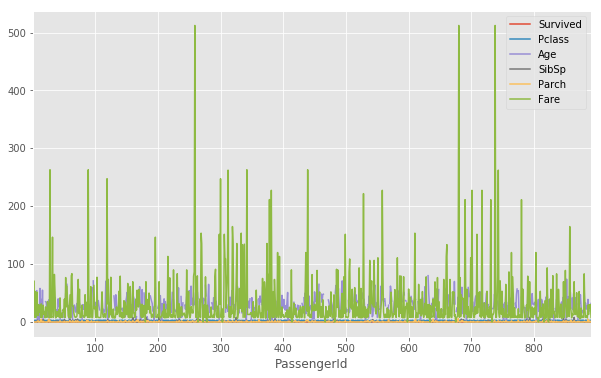

In [69]:
titanic.plot()

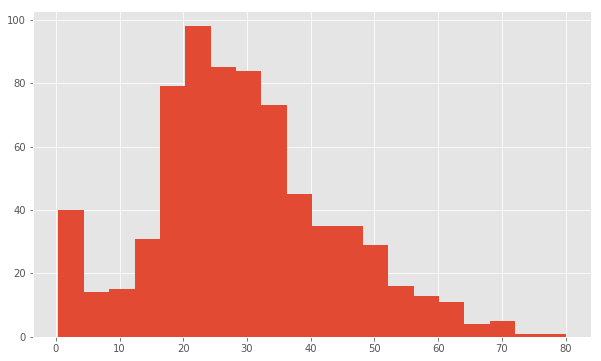

In [72]:
titanic.loc[titanic.Age.notnull(), 'Age'].hist(bins=20)

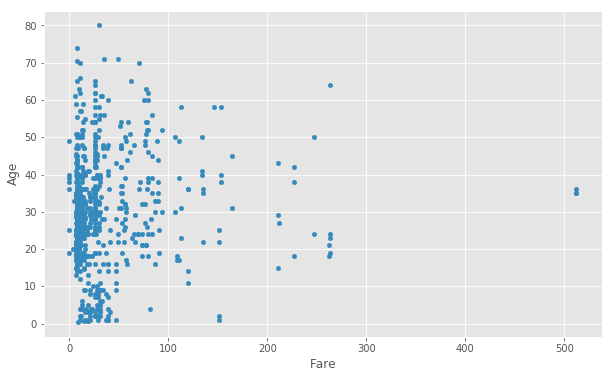

In [73]:
titanic.plot.scatter('Fare', 'Age')

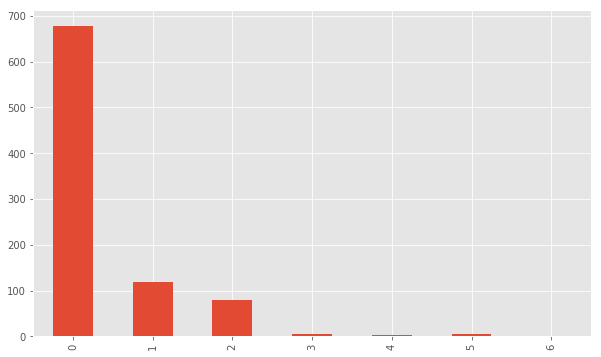

In [74]:
titanic.Parch.value_counts(sort=False).plot.bar()

# Аналитика рынка акций

## Один файл, один лист

In [75]:
df = pd.read_excel('./stocks_data/2016-11-23.xls', sheetname='AAPL')

In [76]:
df

,Time,Open,High,Low,Close,Volume
0,16:00:00,110.42,110.57,109.80,110.01,3668988
1,17:00:00,110.01,110.14,109.40,109.46,4347184
2,18:00:00,109.47,109.94,109.46,109.94,3094138
3,19:00:00,109.94,110.15,109.84,110.01,2285072
4,20:00:00,110.02,110.24,109.76,110.12,1860117
5,21:00:00,110.12,110.43,110.08,110.12,2140079
6,22:00:00,110.11,110.30,109.97,110.28,5637615


In [80]:
type(df.Time.iloc[0])

unicode

Преобразуем поле `Time` к типу `datetime`:

In [85]:
pd.to_datetime('2016-11-23 ' + df.Time, infer_datetime_format=True)

0   2016-11-23 16:00:00
1   2016-11-23 17:00:00
2   2016-11-23 18:00:00
3   2016-11-23 19:00:00
4   2016-11-23 20:00:00
5   2016-11-23 21:00:00
6   2016-11-23 22:00:00
Name: Time, dtype: datetime64[ns]

In [86]:
df.Time = pd.to_datetime('2016-11-23 ' + df.Time)

In [88]:
df.dtypes

Time      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [89]:
df.set_index('Time', inplace=True)

In [90]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2016-11-23 16:00:00,110.42,110.57,109.80,110.01,3668988
2016-11-23 17:00:00,110.01,110.14,109.40,109.46,4347184
2016-11-23 18:00:00,109.47,109.94,109.46,109.94,3094138
2016-11-23 19:00:00,109.94,110.15,109.84,110.01,2285072
2016-11-23 20:00:00,110.02,110.24,109.76,110.12,1860117
2016-11-23 21:00:00,110.12,110.43,110.08,110.12,2140079
2016-11-23 22:00:00,110.11,110.30,109.97,110.28,5637615


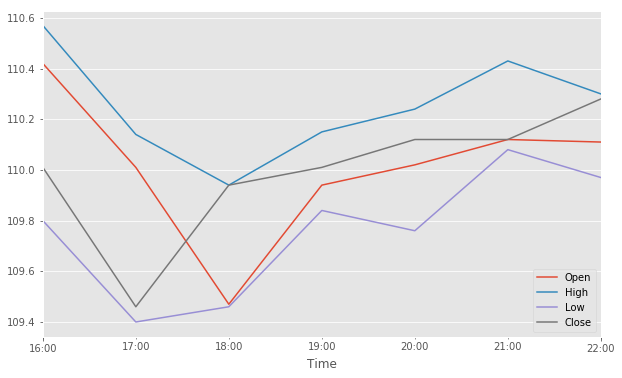

In [91]:
df[['Open', 'High', 'Low', 'Close']].plot()

## Один файл, все листы

In [92]:
dfs = pd.read_excel('./stocks_data/2016-11-23.xls', sheetname=None)

In [93]:
type(dfs)

collections.OrderedDict

In [94]:
dfs.keys()

[u'AAPL', u'GOOG', u'MSFT']

In [95]:
dfs['AAPL']

,Time,Open,High,Low,Close,Volume
0,16:00:00,110.42,110.57,109.80,110.01,3668988
1,17:00:00,110.01,110.14,109.40,109.46,4347184
2,18:00:00,109.47,109.94,109.46,109.94,3094138
3,19:00:00,109.94,110.15,109.84,110.01,2285072
4,20:00:00,110.02,110.24,109.76,110.12,1860117
5,21:00:00,110.12,110.43,110.08,110.12,2140079
6,22:00:00,110.11,110.30,109.97,110.28,5637615


In [96]:
dfs['GOOG']

,Time,Open,High,Low,Close,Volume
0,16:00:00,767.73,768.2825,756.35,757.9900,230877
1,17:00:00,757.94,759.6100,755.25,757.7500,188032
2,18:00:00,757.61,759.4400,756.00,759.4400,95916
3,19:00:00,759.45,760.5000,757.57,757.9851,82822
4,20:00:00,758.19,759.2700,756.60,756.8800,57723
5,21:00:00,757.33,760.1000,757.20,758.5660,59007
6,22:00:00,758.49,761.0700,758.10,760.9900,334191


Объединение таблиц:

In [98]:
pd.concat( [ dfs['AAPL'], dfs['GOOG'] ], ignore_index=True )

,Time,Open,High,Low,Close,Volume
0,16:00:00,110.42,110.57,109.80,110.0100,3668988
1,17:00:00,110.01,110.14,109.40,109.4600,4347184
2,18:00:00,109.47,109.94,109.46,109.9400,3094138
3,19:00:00,109.94,110.15,109.84,110.0100,2285072
4,20:00:00,110.02,110.24,109.76,110.1200,1860117
...,...,...,...,...,...,...
9,18:00:00,757.61,759.44,756.00,759.4400,95916
10,19:00:00,759.45,760.50,757.57,757.9851,82822
11,20:00:00,758.19,759.27,756.60,756.8800,57723
12,21:00:00,757.33,760.10,757.20,758.5660,59007


In [99]:
pd.concat([dfs['AAPL'], dfs['GOOG']], ignore_index=True)

,Time,Open,High,Low,Close,Volume
0,16:00:00,110.42,110.57,109.80,110.0100,3668988
1,17:00:00,110.01,110.14,109.40,109.4600,4347184
2,18:00:00,109.47,109.94,109.46,109.9400,3094138
3,19:00:00,109.94,110.15,109.84,110.0100,2285072
4,20:00:00,110.02,110.24,109.76,110.1200,1860117
...,...,...,...,...,...,...
9,18:00:00,757.61,759.44,756.00,759.4400,95916
10,19:00:00,759.45,760.50,757.57,757.9851,82822
11,20:00:00,758.19,759.27,756.60,756.8800,57723
12,21:00:00,757.33,760.10,757.20,758.5660,59007


In [100]:
pd.concat([dfs['AAPL'], dfs['GOOG']], axis=1)

,Time,Open,High,Low,Close,...,Open,High,Low,Close,Volume
0,16:00:00,110.42,110.57,109.80,110.01,...,767.73,768.2825,756.35,757.9900,230877
1,17:00:00,110.01,110.14,109.40,109.46,...,757.94,759.6100,755.25,757.7500,188032
2,18:00:00,109.47,109.94,109.46,109.94,...,757.61,759.4400,756.00,759.4400,95916
3,19:00:00,109.94,110.15,109.84,110.01,...,759.45,760.5000,757.57,757.9851,82822
4,20:00:00,110.02,110.24,109.76,110.12,...,758.19,759.2700,756.60,756.8800,57723
5,21:00:00,110.12,110.43,110.08,110.12,...,757.33,760.1000,757.20,758.5660,59007
6,22:00:00,110.11,110.30,109.97,110.28,...,758.49,761.0700,758.10,760.9900,334191


In [102]:
dfs['AAPL'].add_prefix('AAPL_')

,AAPL_Time,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume
0,16:00:00,110.42,110.57,109.80,110.01,3668988
1,17:00:00,110.01,110.14,109.40,109.46,4347184
2,18:00:00,109.47,109.94,109.46,109.94,3094138
3,19:00:00,109.94,110.15,109.84,110.01,2285072
4,20:00:00,110.02,110.24,109.76,110.12,1860117
5,21:00:00,110.12,110.43,110.08,110.12,2140079
6,22:00:00,110.11,110.30,109.97,110.28,5637615


In [103]:
pd.concat([dfs['AAPL'].add_prefix('AAPL_'), dfs['GOOG'].add_prefix('GOOG_')], axis=1)

,AAPL_Time,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,...,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume
0,16:00:00,110.42,110.57,109.80,110.01,...,767.73,768.2825,756.35,757.9900,230877
1,17:00:00,110.01,110.14,109.40,109.46,...,757.94,759.6100,755.25,757.7500,188032
2,18:00:00,109.47,109.94,109.46,109.94,...,757.61,759.4400,756.00,759.4400,95916
3,19:00:00,109.94,110.15,109.84,110.01,...,759.45,760.5000,757.57,757.9851,82822
4,20:00:00,110.02,110.24,109.76,110.12,...,758.19,759.2700,756.60,756.8800,57723
5,21:00:00,110.12,110.43,110.08,110.12,...,757.33,760.1000,757.20,758.5660,59007
6,22:00:00,110.11,110.30,109.97,110.28,...,758.49,761.0700,758.10,760.9900,334191


`pd.merge()` – продвинутый способ объединения таблиц. Важные параметры:
- `how='inner'` – тип джойна: `'inner'` (пересечение индексов),`'outer'` (объединение индексов), `'left'`/`'right'` (индексы левой/правой таблицы)
- `left_on='col_name'` или `left_index=True` – поле (или индекс) для джойна левой таблицы
- `right_on='col_name` или `right_index=True` – поле (или индекс) для джойна правой таблицы

In [104]:
pd.merge(dfs['AAPL'], dfs['GOOG'], how='outer', on='Time', suffixes=('_AAPL', '_GOOG'))

,Time,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,...,Open_GOOG,High_GOOG,Low_GOOG,Close_GOOG,Volume_GOOG
0,16:00:00,110.42,110.57,109.80,110.01,...,767.73,768.2825,756.35,757.9900,230877
1,17:00:00,110.01,110.14,109.40,109.46,...,757.94,759.6100,755.25,757.7500,188032
2,18:00:00,109.47,109.94,109.46,109.94,...,757.61,759.4400,756.00,759.4400,95916
3,19:00:00,109.94,110.15,109.84,110.01,...,759.45,760.5000,757.57,757.9851,82822
4,20:00:00,110.02,110.24,109.76,110.12,...,758.19,759.2700,756.60,756.8800,57723
5,21:00:00,110.12,110.43,110.08,110.12,...,757.33,760.1000,757.20,758.5660,59007
6,22:00:00,110.11,110.30,109.97,110.28,...,758.49,761.0700,758.10,760.9900,334191


In [105]:
pd.concat([dfs['AAPL'], dfs['GOOG']])

,Time,Open,High,Low,Close,Volume
0,16:00:00,110.42,110.57,109.80,110.0100,3668988
1,17:00:00,110.01,110.14,109.40,109.4600,4347184
2,18:00:00,109.47,109.94,109.46,109.9400,3094138
3,19:00:00,109.94,110.15,109.84,110.0100,2285072
4,20:00:00,110.02,110.24,109.76,110.1200,1860117
...,...,...,...,...,...,...
2,18:00:00,757.61,759.44,756.00,759.4400,95916
3,19:00:00,759.45,760.50,757.57,757.9851,82822
4,20:00:00,758.19,759.27,756.60,756.8800,57723
5,21:00:00,757.33,760.10,757.20,758.5660,59007


In [108]:
for ticker, df in dfs.iteritems():
    df['Ticker'] = ticker

In [111]:
pd.concat([dfs['AAPL'], dfs['GOOG'], dfs['MSFT']], ignore_index=True)

,Time,Open,High,Low,Close,Volume,Ticker
0,16:00:00,110.420,110.570,109.800,110.010,3668988,AAPL
1,17:00:00,110.010,110.140,109.400,109.460,4347184,AAPL
2,18:00:00,109.470,109.940,109.460,109.940,3094138,AAPL
3,19:00:00,109.940,110.150,109.840,110.010,2285072,AAPL
4,20:00:00,110.020,110.240,109.760,110.120,1860117,AAPL
...,...,...,...,...,...,...,...
16,18:00:00,59.743,59.763,59.546,59.639,1876748,MSFT
17,19:00:00,59.634,59.773,59.566,59.585,1356700,MSFT
18,20:00:00,59.595,59.674,59.546,59.556,1160783,MSFT
19,21:00:00,59.556,59.753,59.556,59.638,1912113,MSFT


In [112]:
pd.concat(dfs.values(), ignore_index=True)

,Time,Open,High,Low,Close,Volume,Ticker
0,16:00:00,110.420,110.570,109.800,110.010,3668988,AAPL
1,17:00:00,110.010,110.140,109.400,109.460,4347184,AAPL
2,18:00:00,109.470,109.940,109.460,109.940,3094138,AAPL
3,19:00:00,109.940,110.150,109.840,110.010,2285072,AAPL
4,20:00:00,110.020,110.240,109.760,110.120,1860117,AAPL
...,...,...,...,...,...,...,...
16,18:00:00,59.743,59.763,59.546,59.639,1876748,MSFT
17,19:00:00,59.634,59.773,59.566,59.585,1356700,MSFT
18,20:00:00,59.595,59.674,59.546,59.556,1160783,MSFT
19,21:00:00,59.556,59.753,59.556,59.638,1912113,MSFT


Собираем все данные за день в один `DataFrame`:

In [113]:
def stocks_single_date(date_str):
    dfs = pd.read_excel('./stocks_data/{}.xls'.format(date_str), sheetname=None)
    for ticker, df in dfs.iteritems():
        df['Ticker'] = ticker
        df.Time = pd.to_datetime(date_str + ' ' + df.Time)
    all_tickers = pd.concat(dfs.values(), ignore_index=True)
    return all_tickers[['Time', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [117]:
df = stocks_single_date('2016-11-28')
df

,Time,Ticker,Open,High,Low,Close,Volume
0,2016-11-28 16:00:00,AAPL,110.490,111.250,110.450,111.240,4063326
1,2016-11-28 17:00:00,AAPL,111.240,111.520,110.890,110.910,3864710
2,2016-11-28 18:00:00,AAPL,110.910,110.980,110.760,110.970,2076635
3,2016-11-28 19:00:00,AAPL,110.970,111.060,110.800,110.870,1876757
4,2016-11-28 20:00:00,AAPL,110.870,111.020,110.800,110.920,1493616
...,...,...,...,...,...,...,...
16,2016-11-28 18:00:00,MSFT,59.902,60.188,59.892,60.173,1960215
17,2016-11-28 19:00:00,MSFT,60.178,60.306,60.118,60.223,1675013
18,2016-11-28 20:00:00,MSFT,60.218,60.223,60.030,60.080,1436768
19,2016-11-28 21:00:00,MSFT,60.075,60.100,59.892,59.950,1416387


Еще один пример джойна:

In [118]:
descriptions = pd.DataFrame.from_dict(
    {'AAPL' : {'Name' : 'Apple Inc.', 'Employees' : 116000},
     'GOOG' : {'Name' : 'Google Inc.', 'Employees' : 57100},
     'MSFT' : {'Name' : 'Microsoft Corporation', 'Employees' : 114000},
     'IBM' : {'Name' : 'IBM', 'Employees' : 380000}},
    orient='index')

In [119]:
descriptions

,Employees,Name
AAPL,116000,Apple Inc.
GOOG,57100,Google Inc.
IBM,380000,IBM
MSFT,114000,Microsoft Corporation


In [120]:
df

,Time,Ticker,Open,High,Low,Close,Volume
0,2016-11-28 16:00:00,AAPL,110.490,111.250,110.450,111.240,4063326
1,2016-11-28 17:00:00,AAPL,111.240,111.520,110.890,110.910,3864710
2,2016-11-28 18:00:00,AAPL,110.910,110.980,110.760,110.970,2076635
3,2016-11-28 19:00:00,AAPL,110.970,111.060,110.800,110.870,1876757
4,2016-11-28 20:00:00,AAPL,110.870,111.020,110.800,110.920,1493616
...,...,...,...,...,...,...,...
16,2016-11-28 18:00:00,MSFT,59.902,60.188,59.892,60.173,1960215
17,2016-11-28 19:00:00,MSFT,60.178,60.306,60.118,60.223,1675013
18,2016-11-28 20:00:00,MSFT,60.218,60.223,60.030,60.080,1436768
19,2016-11-28 21:00:00,MSFT,60.075,60.100,59.892,59.950,1416387


In [121]:
pd.merge(df, descriptions, how='left', left_on='Ticker', right_index=True)

,Time,Ticker,Open,High,Low,Close,Volume,Employees,Name
0,2016-11-28 16:00:00,AAPL,110.490,111.250,110.450,111.240,4063326,116000,Apple Inc.
1,2016-11-28 17:00:00,AAPL,111.240,111.520,110.890,110.910,3864710,116000,Apple Inc.
2,2016-11-28 18:00:00,AAPL,110.910,110.980,110.760,110.970,2076635,116000,Apple Inc.
3,2016-11-28 19:00:00,AAPL,110.970,111.060,110.800,110.870,1876757,116000,Apple Inc.
4,2016-11-28 20:00:00,AAPL,110.870,111.020,110.800,110.920,1493616,116000,Apple Inc.
...,...,...,...,...,...,...,...,...,...
16,2016-11-28 18:00:00,MSFT,59.902,60.188,59.892,60.173,1960215,114000,Microsoft Corporation
17,2016-11-28 19:00:00,MSFT,60.178,60.306,60.118,60.223,1675013,114000,Microsoft Corporation
18,2016-11-28 20:00:00,MSFT,60.218,60.223,60.030,60.080,1436768,114000,Microsoft Corporation
19,2016-11-28 21:00:00,MSFT,60.075,60.100,59.892,59.950,1416387,114000,Microsoft Corporation


Резюме:
- `pd.read_excel()` для чтения `xls`-файлов
- `pd.concat()` для объединения таблиц в простых случаях (по индексу или игнорируя индекс)
- `pd.merge()` для объединения таблиц в сложных случаях (по любым колонкам, left/right join и т.д.)
- `pd.to_datetime()` для извлечения даты и времени

## Все файлы

In [122]:
import os

In [123]:
os.listdir('./stocks_data/')

['.~lock.2016-11-25.xls#',
 '2016-11-23.xls',
 '2016-11-25.xls',
 '2016-11-28.xls',
 '2016-11-29.xls',
 '2016-11-30.xls',
 '2016-12-01.xls',
 '2016-12-02.xls',
 '2016-12-05.xls',
 '2016-12-06.xls',
 '2016-12-07.xls',
 '2016-12-08.xls',
 '2016-12-09.xls',
 '2016-12-12.xls',
 '2016-12-13.xls',
 '2016-12-14.xls',
 '2016-12-15.xls',
 '2016-12-16.xls',
 '2016-12-19.xls',
 '2016-12-20.xls',
 '2016-12-21.xls',
 '2016-12-22.xls',
 '2016-12-23.xls',
 '2016-12-27.xls',
 '2016-12-28.xls',
 '2016-12-29.xls',
 '2016-12-30.xls',
 '2017-01-03.xls',
 '2017-01-04.xls',
 '2017-01-05.xls',
 '2017-01-06.xls',
 '2017-01-09.xls',
 '2017-01-10.xls',
 '2017-01-11.xls',
 '2017-01-12.xls',
 '2017-01-13.xls',
 '2017-01-17.xls',
 '2017-01-18.xls',
 '2017-01-19.xls',
 '2017-01-20.xls',
 '2017-01-23.xls',
 '2017-01-24.xls',
 '2017-01-25.xls',
 '2017-01-26.xls',
 '2017-01-27.xls',
 '2017-01-30.xls',
 '2017-01-31.xls',
 '2017-02-01.xls',
 '2017-02-02.xls',
 '2017-02-03.xls',
 '2017-02-06.xls',
 '2017-02-07.xls',
 '20

In [124]:
%%time
frames = []
for filename in os.listdir('./stocks_data/'):
    if filename.endswith('.xls'):
        date_str = filename[:-4]
        df = stocks_single_date(date_str)
        frames.append(df)

CPU times: user 2.23 s, sys: 237 ms, total: 2.46 s
Wall time: 3.1 s


In [127]:
frames[10]

,Time,Ticker,Open,High,Low,Close,Volume
0,2016-12-08 16:00:00,AAPL,109.930,111.190,109.670,111.070,4603211
1,2016-12-08 17:00:00,AAPL,111.080,111.090,110.600,110.990,3640574
2,2016-12-08 18:00:00,AAPL,110.990,111.430,110.920,111.100,3251414
3,2016-12-08 19:00:00,AAPL,111.100,111.480,111.020,111.340,2628485
4,2016-12-08 20:00:00,AAPL,111.350,111.400,111.120,111.330,1807103
...,...,...,...,...,...,...,...
16,2016-12-08 18:00:00,MSFT,60.599,60.618,60.326,60.464,2145237
17,2016-12-08 19:00:00,MSFT,60.459,60.652,60.437,60.554,1736824
18,2016-12-08 20:00:00,MSFT,60.554,60.603,60.436,60.474,1728291
19,2016-12-08 21:00:00,MSFT,60.474,60.484,60.168,60.268,2436546


In [128]:
df = pd.concat(frames, ignore_index=True)
df

,Time,Ticker,Open,High,Low,Close,Volume
0,2016-11-23 16:00:00,AAPL,110.420,110.57,109.800,110.01,3668988
1,2016-11-23 17:00:00,AAPL,110.010,110.14,109.400,109.46,4347184
2,2016-11-23 18:00:00,AAPL,109.470,109.94,109.460,109.94,3094138
3,2016-11-23 19:00:00,AAPL,109.940,110.15,109.840,110.01,2285072
4,2016-11-23 20:00:00,AAPL,110.020,110.24,109.760,110.12,1860117
...,...,...,...,...,...,...,...
2971,2017-06-19 18:00:00,MSFT,70.560,70.60,70.470,70.53,1712638
2972,2017-06-19 19:00:00,MSFT,70.540,70.66,70.500,70.53,1463734
2973,2017-06-19 20:00:00,MSFT,70.540,70.80,70.525,70.73,1647091
2974,2017-06-19 21:00:00,MSFT,70.736,70.76,70.590,70.67,1502730


## Работа с датами

[Документация](https://pandas.pydata.org/pandas-docs/stable/timeseries.html)

In [129]:
aapl = df.loc[df.Ticker == 'AAPL']

In [130]:
aapl

,Time,Ticker,Open,High,Low,Close,Volume
0,2016-11-23 16:00:00,AAPL,110.4200,110.570,109.80,110.0100,3668988
1,2016-11-23 17:00:00,AAPL,110.0100,110.140,109.40,109.4600,4347184
2,2016-11-23 18:00:00,AAPL,109.4700,109.940,109.46,109.9400,3094138
3,2016-11-23 19:00:00,AAPL,109.9400,110.150,109.84,110.0100,2285072
4,2016-11-23 20:00:00,AAPL,110.0200,110.240,109.76,110.1200,1860117
...,...,...,...,...,...,...,...
2957,2017-06-19 18:00:00,AAPL,145.8756,146.070,145.61,145.8200,2370543
2958,2017-06-19 19:00:00,AAPL,145.8300,145.969,145.63,145.9362,1749563
2959,2017-06-19 20:00:00,AAPL,145.9400,146.740,145.91,146.5500,2889793
2960,2017-06-19 21:00:00,AAPL,146.5400,146.620,145.98,146.0500,2405616


In [131]:
aapl.Time.dt.date

0       2016-11-23
1       2016-11-23
2       2016-11-23
3       2016-11-23
4       2016-11-23
           ...    
2957    2017-06-19
2958    2017-06-19
2959    2017-06-19
2960    2017-06-19
2961    2017-06-19
Name: Time, Length: 992, dtype: object

In [132]:
aapl.Time.dt.day

0       23
1       23
2       23
3       23
4       23
        ..
2957    19
2958    19
2959    19
2960    19
2961    19
Name: Time, Length: 992, dtype: int64

In [133]:
aapl.Time.dt.hour

0       16
1       17
2       18
3       19
4       20
        ..
2957    18
2958    19
2959    20
2960    21
2961    22
Name: Time, Length: 992, dtype: int64

In [134]:
aapl.Time.dt.week

0       47
1       47
2       47
3       47
4       47
        ..
2957    25
2958    25
2959    25
2960    25
2961    25
Name: Time, Length: 992, dtype: int64

In [135]:
aapl.Time.dt.weekday

0       2
1       2
2       2
3       2
4       2
       ..
2957    0
2958    0
2959    0
2960    0
2961    0
Name: Time, Length: 992, dtype: int64

In [138]:
aapl.Time.dt.is_quarter_end

0       False
1       False
2       False
3       False
4       False
        ...  
2957    False
2958    False
2959    False
2960    False
2961    False
Name: Time, Length: 992, dtype: bool

In [139]:
aapl.set_index('Time')

,Ticker,Open,High,Low,Close,Volume
Time,,,,,,
2016-11-23 16:00:00,AAPL,110.4200,110.570,109.80,110.0100,3668988
2016-11-23 17:00:00,AAPL,110.0100,110.140,109.40,109.4600,4347184
2016-11-23 18:00:00,AAPL,109.4700,109.940,109.46,109.9400,3094138
2016-11-23 19:00:00,AAPL,109.9400,110.150,109.84,110.0100,2285072
2016-11-23 20:00:00,AAPL,110.0200,110.240,109.76,110.1200,1860117
...,...,...,...,...,...,...
2017-06-19 18:00:00,AAPL,145.8756,146.070,145.61,145.8200,2370543
2017-06-19 19:00:00,AAPL,145.8300,145.969,145.63,145.9362,1749563
2017-06-19 20:00:00,AAPL,145.9400,146.740,145.91,146.5500,2889793


In [140]:
aapl.set_index('Time', inplace=True)
aapl.sort_index(inplace=True)

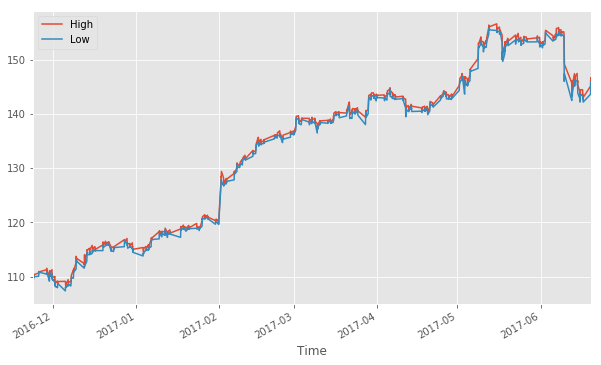

In [141]:
aapl[['High', 'Low']].plot()

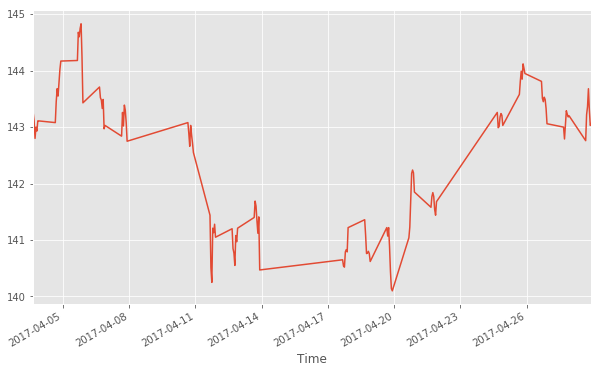

In [144]:
aapl.loc['2017-04', 'Close'].plot()

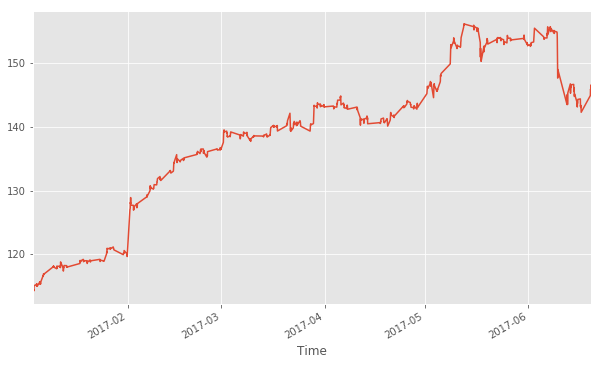

In [145]:
aapl.loc['2017', 'Close'].plot()

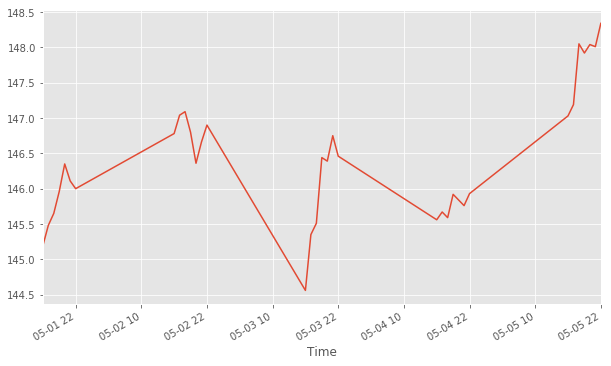

In [146]:
aapl.loc['2017-05-01':'2017-05-07', 'Close'].plot()

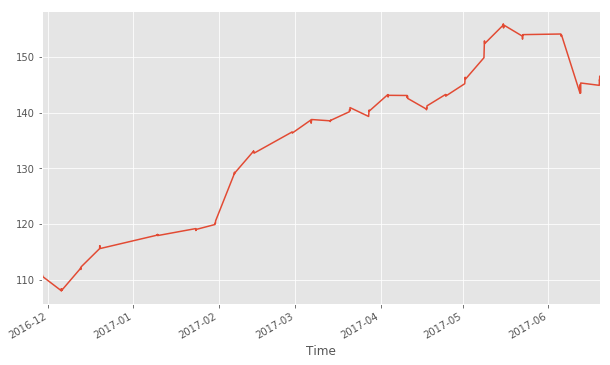

In [153]:
aapl.loc[aapl.index.to_series().dt.weekday == 0].Close.plot()

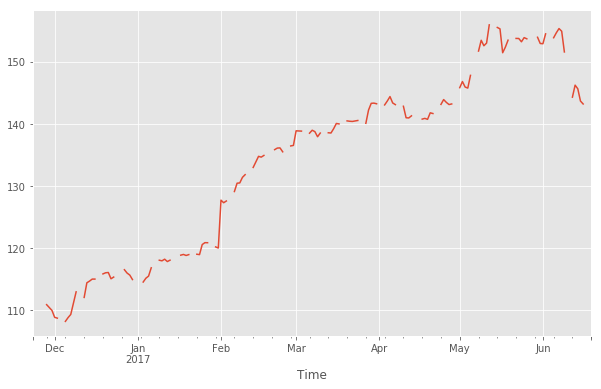

In [147]:
aapl.Close.resample('1D').mean().plot()

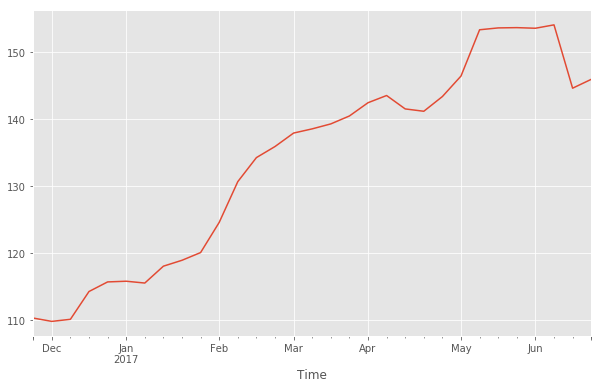

In [154]:
aapl.Close.resample('1W').mean().plot()

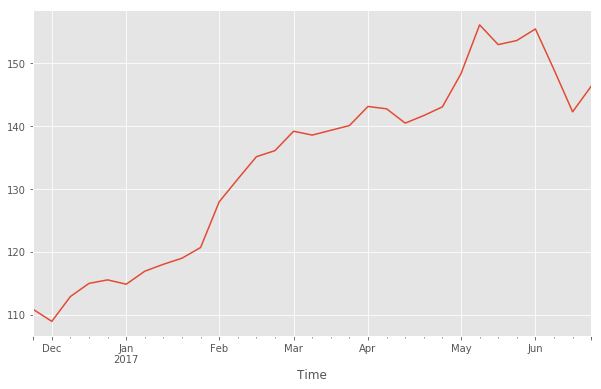

In [155]:
aapl.Close.resample('1W').last().plot()

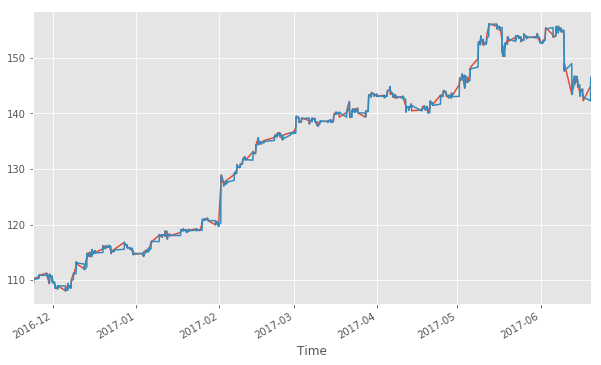

In [156]:
aapl.Close.plot()
aapl.Close.shift().plot()

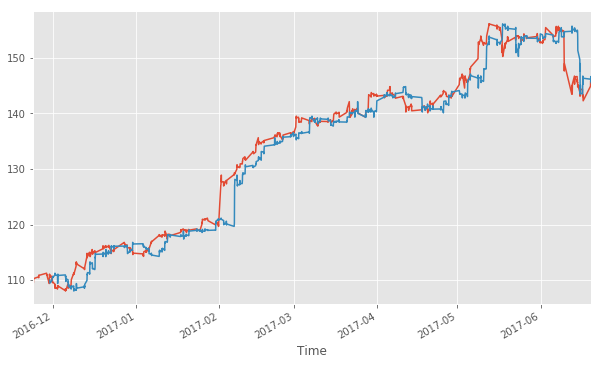

In [157]:
aapl.Close.plot()
aapl.Close.shift(24).plot()

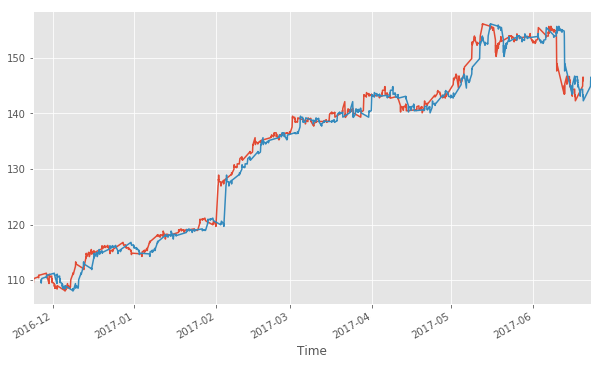

In [158]:
aapl.Close.plot()
aapl.Close.shift(3, freq='D').plot()

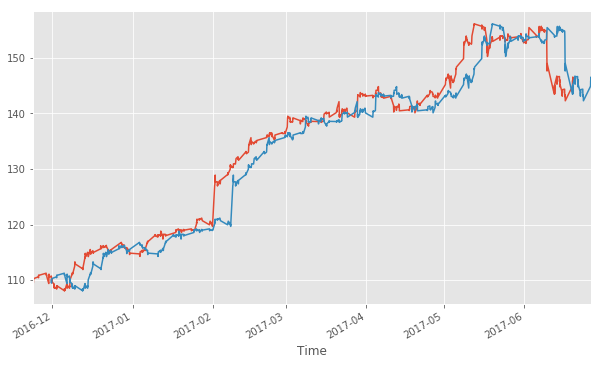

In [160]:
aapl.Close.plot()
aapl.Close.shift(5, freq=pd.offsets.BDay()).plot()

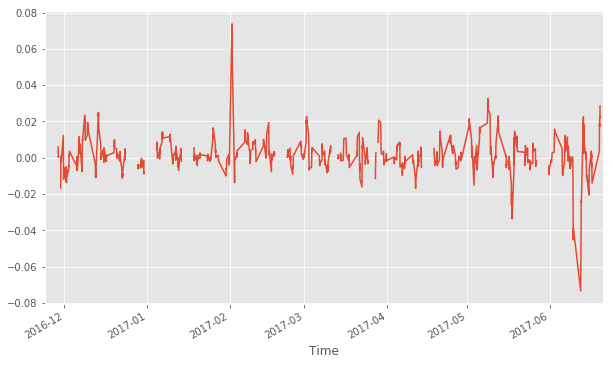

In [161]:
(aapl.Close / aapl.Close.shift(1, freq=pd.offsets.BDay()) - 1.0).plot()

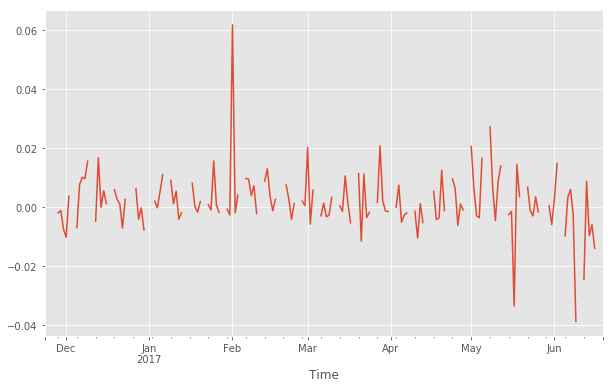

In [162]:
aapl.Close.resample('1D').last().pct_change().plot()

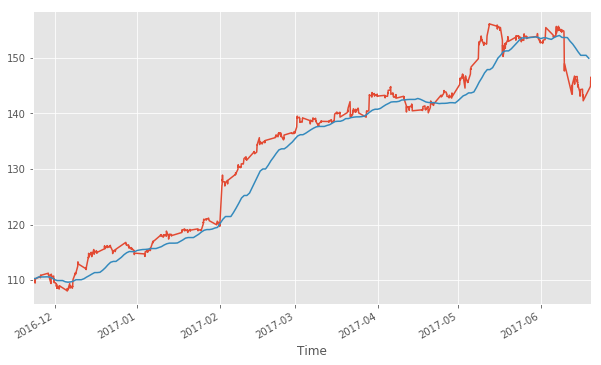

In [165]:
aapl.Close.plot()
aapl.Close.resample('1D').last().rolling(20, min_periods=1, center=False).mean().plot()

In [166]:
import matplotlib.pyplot as plt

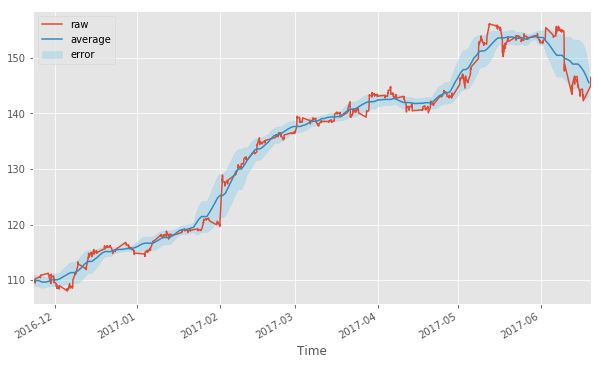

In [167]:
aapl.Close.plot(label='raw')

window = aapl.Close.resample('1D').last().rolling(20, min_periods=1, center=True)
window.mean().plot(label='average')

error = 3 * window.std() / np.sqrt(window.count())
plt.fill_between(error.index, window.mean() - error, window.mean() + error,
                 alpha=0.4, color='skyblue', label='error')

plt.legend(loc='best')